In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("train.csv")
new_cols = ['C' + str(i) for i in range(1, 14 + 1)] + ['X' + str(i) for i in range(1, 19 + 2)]
new_cols[-1] = 'Y'
df.columns = new_cols
# -1 = not happening (negative), 1 = happening (positive)
#df['Y'].replace({-1 : 0}, inplace=True, regex=True)

df.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
0,V1,V1,V1,V1,V1,V1,V2,V1,V3,V5,...,0.352,0.073,-0.092,1.098,0.034,1.160,0.401,0.037,0.216,1
1,V1,V1,V1,V1,V1,V1,V1,V1,V2,V2,...,-1.933,-0.536,-0.092,1.098,0.034,0.716,0.401,0.724,0.216,-1
2,V1,V1,V1,V1,V1,V1,V1,V1,V2,V2,...,-0.762,-0.536,-0.092,1.098,0.034,0.716,0.401,0.712,0.216,-1
3,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.505,-0.536,-0.092,0.182,0.034,0.716,0.401,0.393,0.216,1
4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,0.409,-0.536,-0.092,0.731,0.034,0.716,0.401,0.724,0.216,1


In [3]:
features = df.loc[:, df.columns != 'Y']
numerical_features = df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
target = df['Y']

In [31]:
from sklearn.impute import SimpleImputer
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_imputer.fit(df[numerical_features])
df[numerical_features] = numerical_imputer.transform(df[numerical_features])

categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(df[categorical_features])
df[categorical_features] = categorical_imputer.transform(df[categorical_features])

encoded_features = encoded_df.loc[:, encoded_df.columns != 'Y']
encoded_df = pd.get_dummies(df)

In [5]:
encoded_df.to_csv("export.csv", index=False)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, target, test_size=0.3)
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,C12_V1,C12_V2,C12_V3,C13_V1,C13_V2,C13_V3,C13_V4,C13_V5,C14_V1,C14_V2
379,0.03583,-0.862,-1.092,0.673000,-0.587,0.133,-0.099,0.042333,1.146,-0.025547,...,1,0,0,1,0,0,0,0,0,1
232,1.65500,-0.614,0.823,-0.006849,0.189,-0.513,2.093,0.967000,-1.315,-0.744000,...,0,1,0,0,0,0,0,1,1,0
348,-0.55700,-1.359,0.348,-0.360000,-0.458,-0.513,-0.319,-0.216000,0.537,-0.438000,...,1,0,0,1,0,0,0,0,1,0
271,2.76000,-0.986,-0.617,0.501000,-0.199,0.481,-0.319,1.478000,0.918,-1.643000,...,1,0,0,1,0,0,0,0,0,1
130,0.54900,0.875,1.312,-1.455000,2.775,0.133,0.449,-0.844000,-0.223,-0.025000,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1.65500,-0.118,-0.127,-0.360000,1.223,-1.805,0.120,0.660000,-0.375,-0.744000,...,0,1,0,1,0,0,0,0,0,1
158,1.37800,0.379,1.312,0.657000,0.060,-1.159,-0.867,1.931000,-0.984,-1.445000,...,0,1,0,1,0,0,0,0,0,1
81,-0.28000,-0.614,0.348,-1.064000,-0.199,-0.513,1.216,1.464000,0.081,-1.104000,...,1,0,0,1,0,0,0,0,1,0
83,-0.33600,-0.862,0.348,-0.282000,0.189,2.717,-1.196,1.595000,-1.592,-1.194000,...,1,0,0,1,0,0,0,0,0,1


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#classifier = SVC(gamma='auto')
classifier = BaggingClassifier(n_estimators=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[66  0]
 [ 0 54]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        54

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [10]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	model.fit(X_train, y_train)
	return cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

models, names = list(), list()
# SVM
models.append(SVC(gamma='auto'))
names.append('SVM')
# KNN
models.append(KNeighborsClassifier())
names.append('KNN')
# Bagging
models.append(BaggingClassifier(n_estimators=1000))
names.append('BAG')
# RF
models.append(RandomForestClassifier(n_estimators=1000))
names.append(' RF')
# ET
models.append(ExtraTreesClassifier(n_estimators=1000))
names.append(' ET')

results = list()
for i in range(len(models)):
	scores = evaluate_model(X_train, y_train, X_test, y_test, models[i])
	results.append(scores)
	print('>%s %.3f (%.3f)' % (names[i], scores.mean(), scores.std()))

>SVM 0.933 (0.054)
>KNN 0.747 (0.083)
>BAG 1.000 (0.000)
> RF 0.997 (0.010)
> ET 0.994 (0.014)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

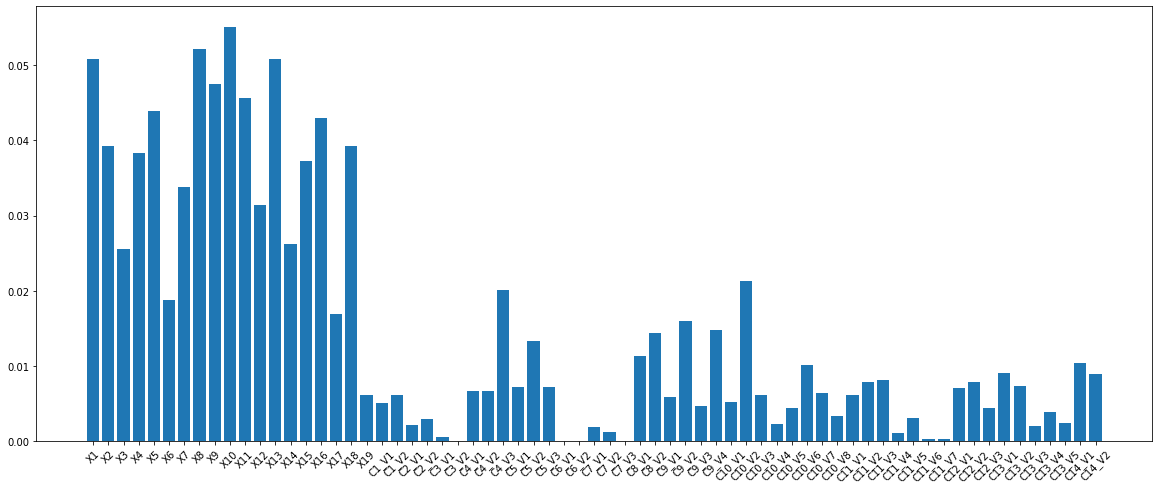

In [39]:
clf = RandomForestClassifier()
clf.fit(encoded_features, target)

plt.figure(figsize=(20,8))
plt.bar(encoded_features.columns, clf.feature_importances_)
plt.xticks(rotation=45)